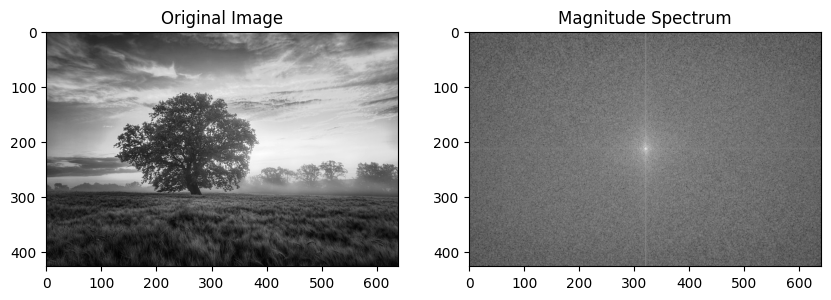

In [3]:
# Fourier Transform (for frequency domain analysis)


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('/content/field-6574455_640.jpg', cv2.IMREAD_GRAYSCALE)

# Perform Fourier Transform
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Calculate magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Show original and magnitude spectrum
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.show()


In [5]:
# Wavelet Transform (for multi-resolution analysis)
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.9 MB/s eta 0:00:00


In [6]:
import pywt
import cv2
import matplotlib.pyplot as plt

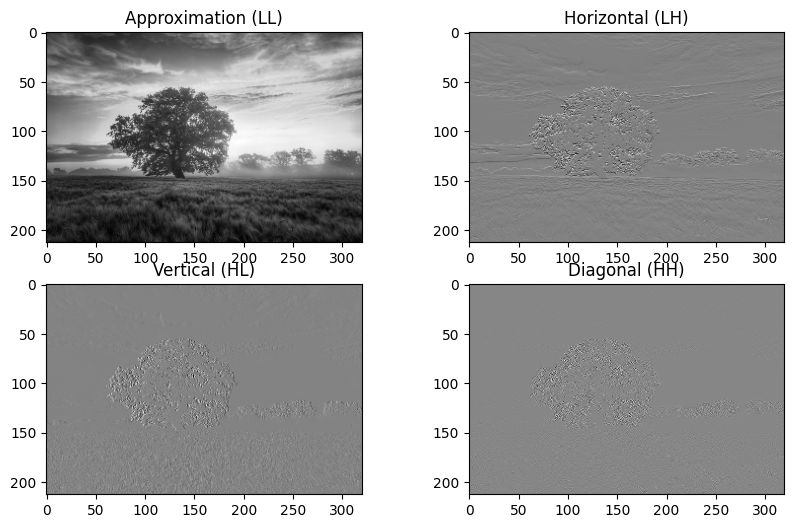

In [7]:
# Load the image in grayscale
img = cv2.imread('/content/field-6574455_640.jpg', cv2.IMREAD_GRAYSCALE)

# Perform wavelet transform using 'haar' wavelet
coeffs2 = pywt.dwt2(img, 'haar')
LL, (LH, HL, HH) = coeffs2

# Display the wavelet decomposition results
plt.figure(figsize=(10, 6))
plt.subplot(221), plt.imshow(LL, cmap='gray'), plt.title('Approximation (LL)')
plt.subplot(222), plt.imshow(LH, cmap='gray'), plt.title('Horizontal (LH)')
plt.subplot(223), plt.imshow(HL, cmap='gray'), plt.title('Vertical (HL)')
plt.subplot(224), plt.imshow(HH, cmap='gray'), plt.title('Diagonal (HH)')
plt.show()


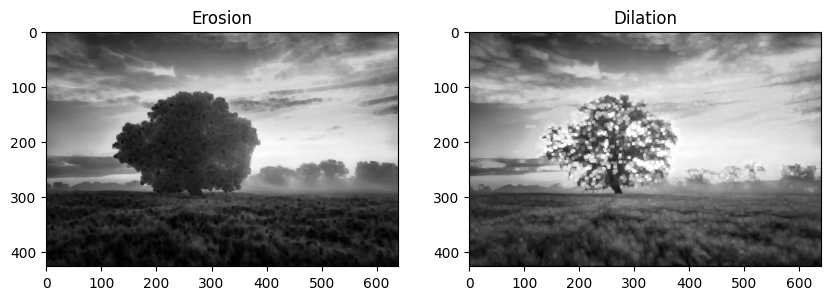

In [8]:
# Morphological Operations (for image shape processing)


# Load image in grayscale
img = cv2.imread('/content/field-6574455_640.jpg', cv2.IMREAD_GRAYSCALE)

# Define kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)

# Perform erosion and dilation
erosion = cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(img, kernel, iterations=1)

# Display results
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(erosion, cmap='gray'), plt.title('Erosion')
plt.subplot(122), plt.imshow(dilation, cmap='gray'), plt.title('Dilation')
plt.show()


In [13]:
import cv2

# Load images from uploaded files
img1 = cv2.imread('pexels-googledeepmind-17485705.jpg')
img2 = cv2.imread('pexels-koolshooters-8104862.jpg')
img3 = cv2.imread('pexels-tima-miroshnichenko-5846252.jpg')

# Create stitcher object
stitcher = cv2.Stitcher_create()

# Perform stitching
status, panorama = stitcher.stitch([img1, img2, img3])

# Check if stitching was successful and save result
result = None
if status == cv2.Stitcher_OK:
    result_path = '/mnt/data/panorama_result.jpg'
    cv2.imwrite(result_path, panorama)
    result = result_path
status, result


(1, None)

Debugging and Fixing Options:
Verify image size and dimensions: If the images have very different sizes or orientations, stitching may fail. We can try resizing or aligning them first.

Increase feature detection robustness: We can ensure that sufficient keypoints are being detected by using alternative stitching methods or manually resizing the images for better overlap.

In [15]:
# Resize all images to the same height for better alignment
height = 500  # Setting a common height for all images

# Resize images to have the same height while maintaining aspect ratio
def resize_image(image, target_height):
    ratio = target_height / image.shape[0]
    return cv2.resize(image, (int(image.shape[1] * ratio), target_height))

img1_resized = resize_image(img1, height)
img2_resized = resize_image(img2, height)
img3_resized = resize_image(img3, height)

# Attempt stitching again with resized images
status, panorama_resized = stitcher.stitch([img1_resized, img2_resized, img3_resized])

# Check if stitching was successful and save the result
resized_result = None
if status == cv2.Stitcher_OK:
    resized_result_path = 'data/panorama_resized_result.jpg'
    cv2.imwrite(resized_result_path, panorama_resized)
    resized_result = resized_result_path
status, resized_result


(1, None)

The stitching process still failed with status code 1, even after resizing the images. This suggests that the images may not have enough overlapping regions or key features for the stitching algorithm to work effectively.

proceed with keypoint matching using SIFT/ORB

In [16]:
# Using ORB (Oriented FAST and Rotated BRIEF) for keypoint detection and matching
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1_resized, None)
kp2, des2 = orb.detectAndCompute(img2_resized, None)
kp3, des3 = orb.detectAndCompute(img3_resized, None)

# Use BFMatcher (Brute Force Matcher) to find matches between keypoints
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors between the images
matches_1_2 = bf.match(des1, des2)
matches_2_3 = bf.match(des2, des3)

# Sort the matches based on distance (lower distance is better)
matches_1_2 = sorted(matches_1_2, key=lambda x: x.distance)
matches_2_3 = sorted(matches_2_3, key=lambda x: x.distance)

# Draw matches for visualization
img_matches_1_2 = cv2.drawMatches(img1_resized, kp1, img2_resized, kp2, matches_1_2[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches_2_3 = cv2.drawMatches(img2_resized, kp2, img3_resized, kp3, matches_2_3[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Save the matching visualization results
matches_1_2_path = 'matches_1_2.jpg'
matches_2_3_path = 'matches_2_3.jpg'

cv2.imwrite(matches_1_2_path, img_matches_1_2)
cv2.imwrite(matches_2_3_path, img_matches_2_3)

(matches_1_2_path, matches_2_3_path)


('matches_1_2.jpg', 'matches_2_3.jpg')